# PROJECT : PREDICTING FLIGHT TIME PERFORMANCES ACROSS THE U.S. WITH MACHINE LEARNING

## Project Overview: 

This was project was done on an Exploratory basis. 

###### The Dataset

This Project's dataset was taken from The United States Department of Transportation's [official-website](https://www.transportation.gov/), under the section Bureau of Transportation Statistics. Click [HERE](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time) to go directly to the website's page where the dataset can be downloaded. The data files are in CSV format. 

######  Project Description



## Opening and Reading into the Dataset.

In this first step we will open and read into the dataset called ** "flight_data.csv"**. We will do this by using a built in python library known as ** pandas**. This library enables us to call a method **pd.read_csv()** which enables us to read into the dataset. To learn more about this we can look at the [pandas-documentation](http://pandas.pydata.org/pandas-docs/stable/). 

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.externals import joblib
from IPython.display import display

# Display the max rows and columns in a dataframe
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth',100)
%matplotlib inline 

# Reading into the CSV file
data = "flight_data.csv"
flight_data = pd.read_csv(data, low_memory = False)

print("Data loaded Successfully")
print("The data has {} samples with {} features each".format(*flight_data.shape))

Data loaded Successfully
The data has 445827 samples with 110 features each


From the Printed Lines above the data has been readed into successfully. We can begin to look at what the data looks like. We can do this by printing the first few rows of our dataset by calling the **.head()** method, Like below:

In [3]:
flight_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Exploration 

In this section, we will begin to explore. This will help us learn certain characteristics or aspects about the data. 

Here is the Agenda for this section:
- Data Visualizations
  1. Mapping Major Cities with Airports Across the United States
  2. Showing the Top 10 City Destinations in the United States
- A More Detailed Exploration (Analyzing certain aspects about the Data)
- Identifying Missing Values within the Dataset

### Data Visualizations 

An illustration can say many words! Here in this section, we will plot two graphs.

###### Mapping Major Cities with Airports Across the United States

Here, we plot a map showing all the cities with airports across the country of the United States of America. We will plot the map using tools such BaseMap and Geopy.
(Note: Cities are marked with red dots!)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Could not locate Mission/McAllen/Edinburg, TX
Could not locate Newburgh/Poughkeepsie, NY
Could not locate Bristol/Johnson City/Kingsport, TN
Could not locate Saginaw/Bay City/Midland, MI
Could not locate Sun Valley/Hailey/Ketchum, ID
Could not locate Cedar Rapids/Iowa City, IA
Could not locate Iron Mountain/Kingsfd, MI
Could not locate New Bern/Morehead/Beaufort, NC


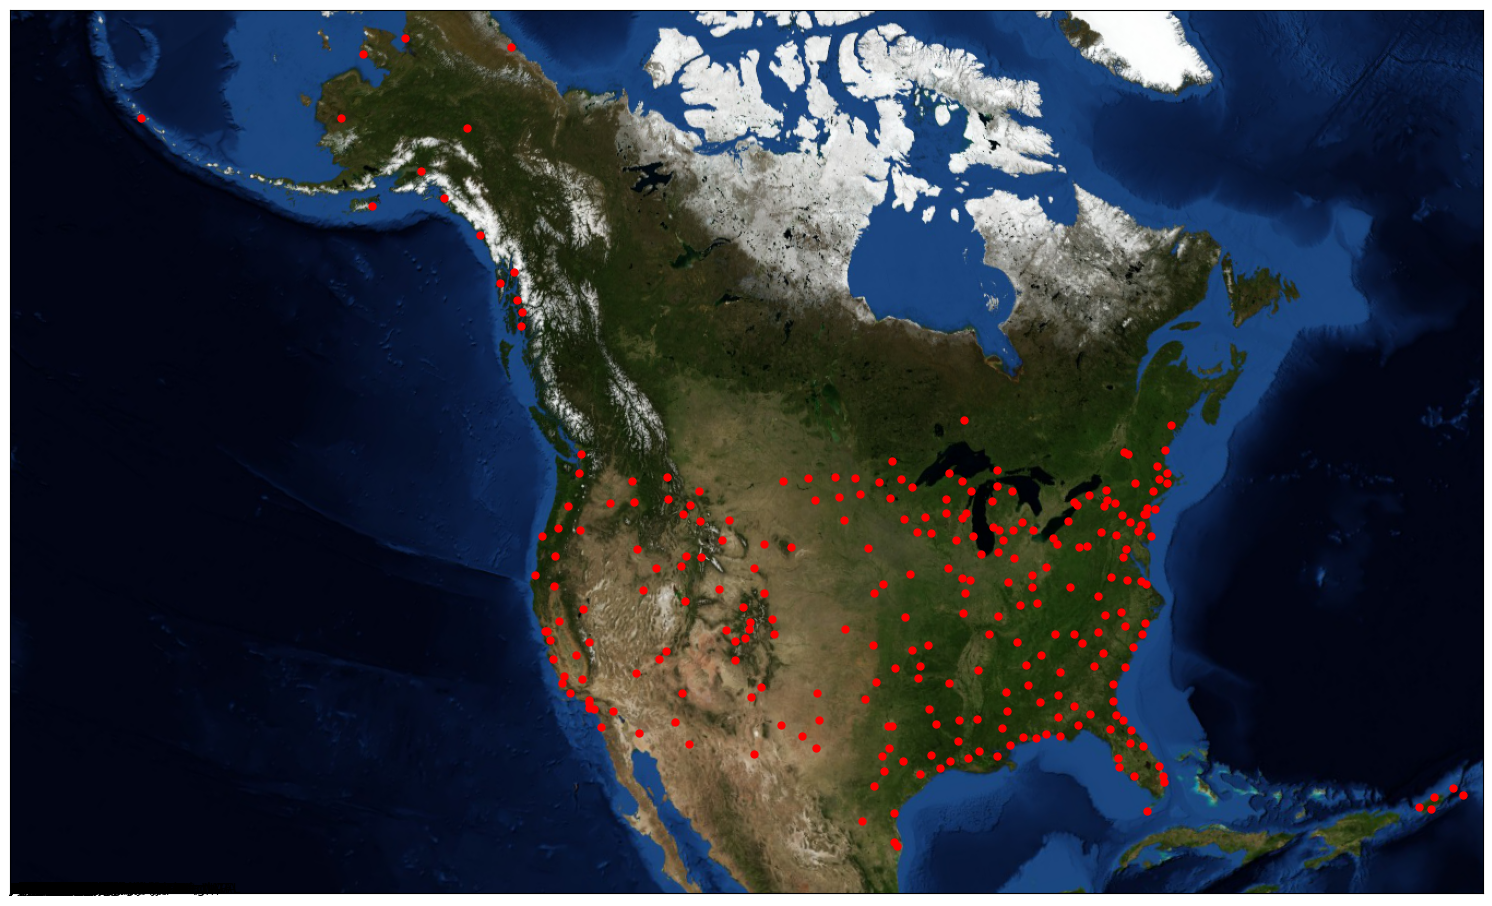

In [3]:
""" Using basemap and maplotlib to create a Map with coordinates"""

city_list = list(flight_data["OriginCityName"].unique())
cities = city_list
scale = 1

map = Basemap(width=10000000,height=6000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
plt.figure(figsize=(19,20))
map.bluemarble()


# Get the location of each city and plot it
geolocator = Nominatim(user_agent="http")
for city in cities:
    loc = geolocator.geocode(city)
    if not loc:
        print("Could not locate {}".format(city))
        continue
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=5)
    plt.annotate(city, xy = (x,y), xytext=(-20,20))
plt.show()

Above, we see that map successfully plots the cities of the United States of America. We also see the printed names of the cities that could not be located on the map.

###### Showing the Top 10 City Destinations in the United States

Here, we should the top ten most frequently visited cities in the United States

[Text(0, 0.5, 'Top 10 City Destinations in The US'),
 Text(0.5, 0, 'Count of Destinations')]

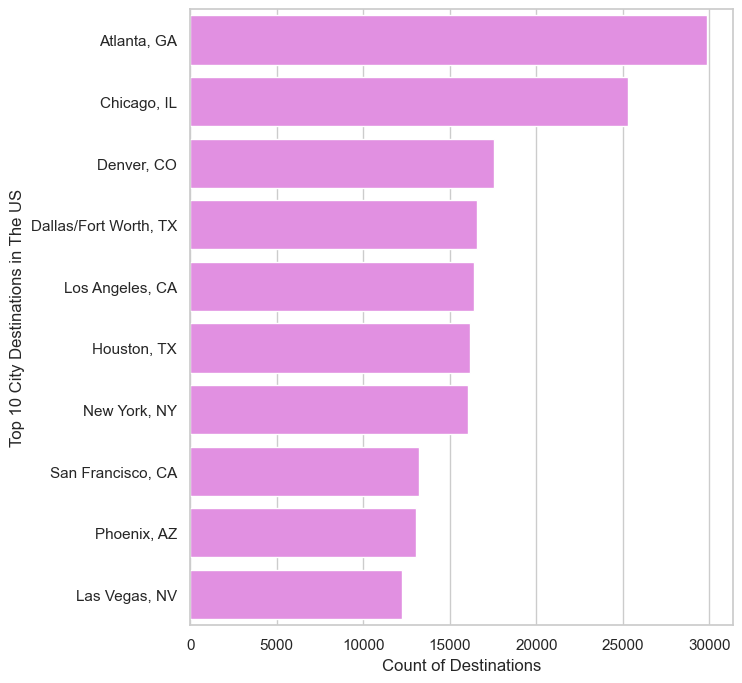

In [4]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# 
destinations = flight_data["DestCityName"].value_counts()
destination_10_counts = destinations[:10]
indices = destination_10_counts.index
top_10_destinations = indices

# plotting the graph
sns.set_color_codes("dark")
sns.barplot(x=destination_10_counts, y=top_10_destinations,
            color="violet", orient='h')

ax.set(ylabel="Top 10 City Destinations in The US",
       xlabel="Count of Destinations")

### A More Detailed Exploration 

In this section, we will be taking a look at characteristics or certain aspects of the data such as departure delays, arrival delays and more... 

Before we begin doing our detailed exploration we will be creating a variable called ** flight_data_explored**. 

(Note: This variable will only be used within the Data Exploration Section)

In [6]:
flight_data_explored = flight_data.copy()
print("Variable for Flight data exploration has been created Successfully!")

Variable for Flight data exploration has been created Successfully!


###### Analyzing Departure Delayed Flights greater than one hundred minutes 

Here we will analyze the flights scheduled for departure with a delay greater than one hundred minutes.

In [27]:
delayed_flights_over_100mins = flight_data_explored[flight_data_explored["DepDelayMinutes"] >= 1]

delayed_flights_100_filtered = delayed_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(delayed_flights_100_filtered.head()))
print(delayed_flights_100_filtered.shape)

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
3,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
5,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
13,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
15,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW


None
(149141, 7)


In [11]:
print(flight_data_explored['DepDelay'].describe())

count    434354.000000
mean          7.793537
std          36.833007
min         -47.000000
25%                NaN
50%                NaN
75%                NaN
max        1663.000000
Name: DepDelay, dtype: float64


C:\Users\donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


## Generating quick info about the data

In [ ]:
print(flight_data_processed['DepDelay'].describe())
print('\n')
print(flight_data_processed['DepDelay'].value_counts())

###### Analyzing Arrival Delayed Flights

Here, we analyze the flights with a delay greater than one hundred minutes. 

In [29]:
arrival_flights_over_100mins = flight_data_explored[flight_data_explored["ArrDelayMinutes"] >= 7]

arrival_flights_100_filtered = arrival_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(arrival_flights_100_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
2,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
15,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
22,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
24,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW


None


###### Departure Delays for more than 15 minutes

Here we will analyze the flights delayed for departure greater than 15 minutes 

In [16]:
departure_delay_15mins = flight_data_explored[flight_data_explored["DepDel15"] > 1]
departure_delay_15mins_filtered = departure_delay_15mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]
print (display(departure_delay_15mins_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
15,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
24,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
26,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW
35,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW


None


###### Analyzing Flights that Departed Earlier than Scheduled time


Here, we are going to analyze the flights that departed earlier than their expected time

In [8]:
departure_earlier_than_schedule = flight_data_explored[flight_data_explored["DepDelay"] < 0]
departure_earlier_filtered = departure_earlier_than_schedule[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

print(display(departure_earlier_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
0,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
1,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
2,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
6,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
7,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW


None


###### Analyzing Arrival Delays by Weather

Here, we analyze the arrival delays because of the weather

In [30]:
flight_data_explored['WeatherDelay'].describe()

C:\Users\donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    70882.000000
mean         2.836573
std         23.306995
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max       1093.000000
Name: WeatherDelay, dtype: float64

In [9]:
mask = (flight_data_explored["ArrDelay"] > 0) & (flight_data_explored["WeatherDelay"]>0)
arrival_delayed_weather_filter=flight_data_explored.ix[mask, ["UniqueCarrier","AirlineID", "ArrDelay", "WeatherDelay", ]]
print(display(arrival_delayed_weather_filter.head()))

,UniqueCarrier,AirlineID,ArrDelay,WeatherDelay
15,AA,19805,21.0,21.0
35,AA,19805,116.0,12.0
104,AA,19805,66.0,61.0
132,AA,19805,81.0,26.0
143,AA,19805,73.0,11.0


None


#### Finding the Net Value of Departure and Arrival Delays

In this section we will sum both Departure Delay and ArrivalDelay to find the total delayed time. The results turn out to be either positive or negative 

In [10]:
flight_data_explored["sumDepArr"] = flight_data_explored["DepDelay"] + flight_data_explored["ArrDelay"]
sum_arrival_delay_filter = flight_data_explored[["UniqueCarrier", "AirlineID", "DepDelay", "ArrDelay", "sumDepArr"]]
print(display(sum_arrival_delay_filter.head()))   

,UniqueCarrier,AirlineID,DepDelay,ArrDelay,sumDepArr
0,AA,19805,-3.0,-6.0,-9.0
1,AA,19805,-4.0,-12.0,-16.0
2,AA,19805,-5.0,7.0,2.0
3,AA,19805,2.0,-5.0,-3.0
4,AA,19805,100.0,113.0,213.0


None


###### Total Time to Taxi In and Taxi Out

Here, we are going to add up on how long an aircraft takes to Taxi In into the airport after landing and how long it takes to taxi out onto the runway for departure

In [11]:
flight_data_explored["sumTaxiIn/TaxiOut"] = flight_data_explored["TaxiIn"] + flight_data_explored["TaxiOut"]
sum_taxi_filter = flight_data_explored[["UniqueCarrier", "AirlineID", "Origin", "OriginCityName", "Dest", "DestCityName",
                               "TaxiIn", "TaxiOut", "sumTaxiIn/TaxiOut"]]
print(display(sum_taxi_filter.head()))   

,UniqueCarrier,AirlineID,Origin,OriginCityName,Dest,DestCityName,TaxiIn,TaxiOut,sumTaxiIn/TaxiOut
0,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",8.0,15.0,23.0
1,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",10.0,14.0,24.0
2,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",14.0,21.0,35.0
3,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",9.0,13.0,22.0
4,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",14.0,20.0,34.0


None


###### Calculating the Total  Flight Time 

Here we will find the sum of columns that pertain to time, to find the total time(including delays, stoppages, Taxing Times, and Flight Airtime) a flight takes from reaching from one destination to the other. 

In [12]:
flight_data_explored["TotalJourneyTime"] = (flight_data_explored["TaxiOut"] +
                                           flight_data_explored["TaxiIn"] + flight_data_explored["ArrDelay"] +
                                           flight_data_explored["AirTime"])


total_flight_time = flight_data_explored[["UniqueCarrier", "AirlineID", "Origin", "OriginCityName", "Dest",
                                          "DestCityName", "DepDelay","TaxiOut", "TaxiIn",
                                          "ArrDelay", "AirTime", "TotalJourneyTime"]]

print(display(total_flight_time.head()))

,UniqueCarrier,AirlineID,Origin,OriginCityName,Dest,DestCityName,DepDelay,TaxiOut,TaxiIn,ArrDelay,AirTime,TotalJourneyTime
0,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",-3.0,15.0,8.0,-6.0,132.0,146.0
1,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",-4.0,14.0,10.0,-12.0,126.0,134.0
2,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",-5.0,21.0,14.0,7.0,135.0,172.0
3,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",2.0,13.0,9.0,-5.0,129.0,148.0
4,AA,19805,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",100.0,20.0,14.0,113.0,137.0,384.0


None


In [ ]:
# Insert graph here 

##### Identifying Missing Values within the dataset 

This is the last step of our Data Exploration Stage. We will identify to see if there are any missing values within the dataset. 

In [17]:
missing_data = flight_data.isnull().sum()
print(missing_data)

Year                         0
Quarter                      0
Month                        0
DayofMonth                   0
DayOfWeek                    0
FlightDate                   0
UniqueCarrier                0
AirlineID                    0
Carrier                      0
TailNum                   4244
FlightNum                    0
OriginAirportID              0
OriginAirportSeqID           0
OriginCityMarketID           0
Origin                       0
OriginCityName               0
OriginState                  0
OriginStateFips              0
OriginStateName              0
OriginWac                    0
DestAirportID                0
DestAirportSeqID             0
DestCityMarketID             0
Dest                         0
DestCityName                 0
DestState                    0
DestStateFips                0
DestStateName                0
DestWac                      0
CRSDepTime                   0
DepTime                  11473
DepDelay                 11473
DepDelay

## Data PreProcessing 

In the Data Exploration Section above we did quite a bit of exploration on the data amd eventually found a problem that we want to solve. Earlier we accessed the data and only analyzed it. But in this section we are going to actually interact with the data. The Pre Processing section is where we can say we "groom" or as the topic itself says "preprocess" the data before we begin to make or implement any Predictions. This is very important because the data that is obtained comes from third party sources and in most cases contains error. There are at times many abnormalities within the dataset which can hinder, skew or cause mis leading interpretations while making predictions.

Below in our agenda we are going to outline what we will be focusing on in this section:

** Data Cleaning **
- Dropping Columns 
- Dealing with rows consisting of missing Data 

**Feature Engineering**
- Create New Columns 
- Identifying Column Data types
- Separating Categorical columns and Continuous columns
- Deciphering the dilemma of Categorical Data 
- Sorting One Hot Coding Categorical Variables VS Frequency Distribution Variables
- Feature Scaling by Normalization


Extracting Features and Target Columns


### Data Cleaning 


###### Creating a Copy of the Dataset

In the exploration section a copy was made of the dataset But that was for Exploration pruposes. Before we move ahead and begin working as mentioned this stage will require working with the dataset and changes will be made. It would be a wise idea to create a copy of the dataset first. Why? This is because any changes or implentations we do should not affect the original dataset which is **"flight_data"**. We should not change this.If we do not copy the dataset we can tamper with the original data which can lead to complications. 

In [2]:
# create copy of dataset
flight_data_processed = flight_data.copy()

###### Dropping Column(s)

In this section we are going to drop column(s). But, we should ask ourselves Why do we drop columns and what columns do we drop? We are going to intuitively select columns that are considered important.Also, we will remove the columns which contain too many missing values. Regarding the columns with the missing values we can refer back to the Data Exploration section under **Identifying the Missing Values in a Dataset**

In [3]:
# Here we drop columns that contains missing values.

flight_data_drop = flight_data_processed.drop(["AirlineID", "Carrier", "TailNum", "OriginStateFips", "DestStateFips", 
                                               "Diverted","Flights", "CancellationCode", "DepTimeBlk", "ArrTimeBlk",
                                               "OriginState", "DestState", "DepDelayMinutes", "DepDel15", 
                                               "DepartureDelayGroups"], axis=1)

print("Dropped Columns!")

Dropped Columns!


###### Dropping Columns Continued 

In the above code block we manually selected a few columns to be dropped. 

In the next code block, multiple columns will be dropped via the method slicing using pandas. All the columns after the feature 'CarrierDelay' will be dropped because they contain way too many missing values, making them invaluable, therefore the best choice is to drop all of them at once using slicing. 

This will be done below:

In [6]:
# A list of columns that exist after carrier delay
cols_after_carrier_delay = flight_data_drop.ix[:,"CarrierDelay":].columns
# Show the user these columns

# Drop these columns
flight_data_processed = flight_data_drop.drop(flight_data_drop.ix[:,"CarrierDelay":].columns, axis=1)

# Show the user these columns
print(cols_after_carrier_delay)

# Display the dataframe after dropping columns 
print(display(flight_data_processed.head()))

# Display the shape of the modified data 
print(flight_data_processed.shape)

InvalidIndexError: (slice(None, None, None), slice('CarrierDelay', None, None))

As we can see all the columns that contained way too many missing values have been dropped.

###### Dealing with rows consisting of missing data 

As it can be seen the step ** Dropping Columns**  dealt with quite a bit of the missing values by dropping the columns with vast missing data. However has that solved with dealing all of the missing data? One way to know for sure is to check by identifying the missing values of our updated **flight_data_processed** dataset. Just a reminder this step was done in the exploration stage already!

In [165]:
# Identifying the missing values in the updated dataset
missing_flight_data = flight_data_processed.isnull().sum()
print(missing_flight_data)

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
FlightDate                0
UniqueCarrier             0
FlightNum                 0
OriginAirportID           0
OriginAirportSeqID        0
OriginCityMarketID        0
Origin                    0
OriginCityName            0
OriginStateName           0
OriginWac                 0
DestAirportID             0
DestAirportSeqID          0
DestCityMarketID          0
Dest                      0
DestCityName              0
DestStateName             0
DestWac                   0
CRSDepTime                0
DepTime               11473
DepDelay              11473
TaxiOut               11600
WheelsOff             11600
WheelsOn              11907
TaxiIn                11907
CRSArrTime                0
ArrTime               11907
ArrDelay              12529
ArrDelayMinutes       12529
ArrDel15              12529
ArrivalDelayGroups    12529
Cancelled           

The reason for identifying missing values again is because there are still columns with a few rows consisting of missing values. This helps us to be more specific in which columns exactly have missing values. 
As the results can be seen printed above there columns consisting with rows of data. In an instance where the missing values does not seem ridiculously too much we do not need to remove the whole column but rather we can drop the rows the missing values. There is a method to drop the few rows with missing values. This is done by calling the **.dropna()** method. From the data frame **flight_data_processed** we will manually select the columns containing the missing values and apply the dropna() method.

In [166]:
# Dropping the missing rows 
flight_data_processed = flight_data_processed.dropna(subset = ['DepTime', 'DepDelay', 'TaxiOut',
                                                                         'WheelsOff', 'WheelsOn','TaxiIn', 'ArrTime',
                                                                         'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
                                                                         'ArrivalDelayGroups', 'ActualElapsedTime',
                                                                         'AirTime'])



# Doing a check to make sure the missng values have been removed
print(flight_data_processed.isnull().sum())

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
FlightDate            0
UniqueCarrier         0
FlightNum             0
OriginAirportID       0
OriginAirportSeqID    0
OriginCityMarketID    0
Origin                0
OriginCityName        0
OriginStateName       0
OriginWac             0
DestAirportID         0
DestAirportSeqID      0
DestCityMarketID      0
Dest                  0
DestCityName          0
DestStateName         0
DestWac               0
CRSDepTime            0
DepTime               0
DepDelay              0
TaxiOut               0
WheelsOff             0
WheelsOn              0
TaxiIn                0
CRSArrTime            0
ArrTime               0
ArrDelay              0
ArrDelayMinutes       0
ArrDel15              0
ArrivalDelayGroups    0
Cancelled             0
CRSElapsedTime        0
ActualElapsedTime     0
AirTime               0
Distance              0
DistanceGroup         0
dtype: int64


In the Data Cleaning Section of Pre processing we did some "cleaning up" where we intuitively selected unecessary columns , dropped whole columns with immense amount of missing values and dropped rows from columns which contained missing values. 
Up till this point we have updated our copy of the dataset by removing the missing values. 

In the upcoming step(s) the focus will be on Preparing the Data for Training and Testing 

### Feature Engineering 

We are still in the PreProcessing section. As mentioned earlier our objective is to implement a prediction model in which to do so we have to prepare the data for Training and Testing. But even before Training and Testing we have a key step to cover. 

###### Creating new columns 

IN the Exploration section we created new columns for exploratory purposes only. Here we will implement these new columns into our flight_data_processed variable

In [167]:
# Creating a column to find the Net Value of Departure delay and Arrival Delay 
flight_data_processed["SumDep&Arr"] = flight_data_processed["DepDelay"] + flight_data_processed["ArrDelay"]

# Creating a Column to find the sum of taxing in and taxing out 
flight_data_processed["SumTaxiIn/TaxiOut"] = flight_data_processed["TaxiIn"] + flight_data_processed["TaxiOut"]

# we a column to tell us what time of the day it is, here we will create a column to tell us the part of the day
time_intervals = [0, 700, 1200, 1600, 2400]
parts_of_day = ['Morning','Afternoon','Evening','Night']


flight_data_processed["PartofDay"] = pd.cut(flight_data_processed.DepTime - 500 + 2400*(flight_data_processed.DepTime 
                                                                                      < 500), bins=time_intervals, 
                                           labels=parts_of_day, right=False)
flight_data_processed["PartofDay"] = flight_data_processed["PartofDay"].astype(object)

# Here we will create a column for total journey time including delays, stoppages, Taxing Times, and Flight Airtime
flight_data_processed["TotalJourneyTime"] = (flight_data_processed["TaxiOut"] +
                                             flight_data_processed["TaxiIn"] + flight_data_processed["ArrDelay"] +
                                             flight_data_processed["AirTime"])

new_columns = flight_data_processed[["DepTime", "SumDep&Arr", "SumTaxiIn/TaxiOut", "PartofDay", "TotalJourneyTime"]]

print("New Columns Created!")
print(display(new_columns.head(20)))

New Columns Created!


,DepTime,SumDep&Arr,SumTaxiIn/TaxiOut,PartofDay,TotalJourneyTime
0,1057.0,-9.0,23.0,Morning,149.0
1,1056.0,-16.0,24.0,Morning,138.0
2,1055.0,2.0,35.0,Morning,177.0
3,1102.0,-3.0,22.0,Morning,146.0
4,1240.0,213.0,34.0,Afternoon,284.0
5,1107.0,4.0,20.0,Morning,145.0
6,1059.0,-1.0,23.0,Morning,159.0
7,1055.0,-12.0,24.0,Morning,149.0
8,1058.0,-12.0,20.0,Morning,140.0
9,1056.0,-8.0,25.0,Morning,154.0


None


###### Identifying The DataTypes of the Columns


A simple way for knowing the data types of the columns is by calling the method **.dtypes()** from the **pandas** library. This produces a list of the columns along with their indivudal data type. Below we will call the **.dtypes()** method to our variable **flight_data_drop_missing_rows**. 

In [168]:
flight_data_processed.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
UniqueCarrier          object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCityName         object
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCityName           object
DestStateName          object
DestWac                 int64
CRSDepTime              int64
DepTime               float64
DepDelay              float64
TaxiOut               float64
WheelsOff             float64
WheelsOn              float64
TaxiIn                float64
CRSArrTime              int64
ArrTime               float64
ArrDelay              float64
ArrDelayMinutes       float64
ArrDel15  

Above we see that all our columns are listed with their indivudal data types. We see many datatypes such as **int64**, **float64** and **object**. I can give a small briefing of each:

**int64** - Are columns containing numerical values consisting of Integers

**float64** - Are columns containing numerical values consisting of numbers with decimals

**object** - Are columns containing strings or worded values. 

But we have to ask ourselves how do we identify categorical data types? Categorical data columns can be identifed by the datatype known as **object**, because they contain strings!

This leads us to the next step to Convert the Data types of the columns. 

#### Extracting the Columns with Categorical Data

## Assigning the target column

In [169]:
#Extracting out the target column
target_column = (flight_data_processed["DepDelay"])

flight_data_processed = flight_data_processed.drop(['DepDelay'], axis = 1)

In the earlier step we identified the data types of the columns. We also found out that that the colmuns with a object datatype are the columns containing categorical values. 
Here the task will be to extract those **object** datatype columns. Below we will extract the categorical columns and store them to a list. 

In [170]:
# An empty list to store categoricals
categorical_columns = []

# An empty list to store continuous variables
continuous_columns = []

for column in flight_data_processed:
    if flight_data_processed[column].dtype == "object":
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)
    
print(categorical_columns)
print('\n')
print(continuous_columns)

['FlightDate', 'UniqueCarrier', 'Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName', 'PartofDay']


['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestWac', 'CRSDepTime', 'DepTime', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'Cancelled', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup', 'SumDep&Arr', 'SumTaxiIn/TaxiOut', 'TotalJourneyTime']


From the above printed statement the For loop is successful and the categorical_columns variable contains all the object datatype columns.

##### Deciphering the Dilemma of the Categorical Data

Now that we have extracted our categorical columns we have to deal with them. How do we deal with them?
To make life easy for us the Pandas-documentation has a very useful method called **pd.get_dummies** we can simply apply this to our columns and solve our problem. But before we jump to the conclusion that using pd.get_dummies is the ultimate solution to deal with out categorical values. Let us first just print out a description of the categorical columns below by describing each of the categorical columns by calling **.describe()**. See below: 

In [171]:
print(flight_data_processed['FlightDate'].describe())
print('\n')
print(flight_data_processed['UniqueCarrier'].describe())
print('\n')
print(flight_data_processed['Origin'].describe())
print('\n')
print(flight_data_processed['OriginCityName'].describe())
print('\n')
print(flight_data_processed['OriginStateName'].describe())
print('\n')
print(flight_data_processed['Dest'].describe())
print('\n')
print(flight_data_processed['DestCityName'].describe())
print('\n')
print(flight_data_processed['DestStateName'].describe())
print('\n')
print(flight_data_processed['PartofDay'].describe())

count         433298
unique            31
top       2016-01-03
freq           15757
Name: FlightDate, dtype: object


count     433298
unique        12
top           WN
freq      101335
Name: UniqueCarrier, dtype: object


count     433298
unique       294
top          ATL
freq       29413
Name: Origin, dtype: object


count          433298
unique            290
top       Atlanta, GA
freq            29413
Name: OriginCityName, dtype: object


count         433298
unique            52
top       California
freq           54922
Name: OriginStateName, dtype: object


count     433298
unique       294
top          ATL
freq       29408
Name: Dest, dtype: object


count          433298
unique            290
top       Atlanta, GA
freq            29408
Name: DestCityName, dtype: object


count         433298
unique            52
top       California
freq           54971
Name: DestStateName, dtype: object


count      433298
unique          4
top       Morning
freq       173456
Name: PartofDay, 

Questions must be arising regarding the above code cell.Why are we describing the columns? What are we looking for in the columns descriptions printed out? How is the certain description in which we seek useful in the terms of dealing with the categorical data?

The reason for describing the columns is because we can see the number of rows are there, the unique values present, the top value and the frequent occurance of that value.

Secondly, the main description of the column that we are really interested in is the Unique value. We only have a set number of unique values, what makes up the count is the multiple occurance of these unique values. 
This Last section is very important and explains to why we are doing all this. Earlier we mentioned the pandas method pd.get_dummies. It was mentioned but it was not mentioned on how it worked. The way this works is it creates dummy columns for only the string columns and leave the other columns unchanged. In our case we have six columns with a max unique value of 294. If my math serves me correct we will be generating 1764 of dummy columns of converted data! This will be a big disadvantage because of the time factor. It will be inefficient because it is time consuming in which is computationaly expensive in a real world scenario. the Pandas method is a good way to actually resolve categorical data issues because its known as One-Hot Code method but due to the size of this data and the amount of unique values perhaps it will be effective on a smaller dataset or columns with a smaller count of unique values. 

This problem seems to be putting us on a stand still. But there are other ways to deal with this through other forms of stastics. One other method in which we can apply to solve the problem of working with a large count of unique values is known as Frequency Distribution. What this will do will replace the text values with their respective frequency. 

Before moving ahead this step may have taken some time to digest so I would not blame anyone wanting to take a second read. This is a key step and we must understand it!

###### Sorting One-Hot Code Categorial Variables VS Frequency Distribution Variables

The step above was a true dielmma! But after managing to understand it we should be able to move ahead. Now since we have understood the two methods of dealing with categorical data we are going to apply both methods to our columns.  In this step we are going to separate the columns by the unique values. In which the One-Hot Code known as pandas get_dummies will be applied to the columns with smaller unique values and the Frequnecy Distribution will be applied to the columns with the bigger Unique value counts. the procedure below will show how the columns are seperated. 

In [172]:
# In this section we seperate what columns for frequency distribution  or what columns to apply dummies too

# Seperating the categorical columns into two different lists
dummies_columns = []
frequency_distribution_columns = []
 
for column in categorical_columns:
    # Get one-hot encoded columns
    if len(flight_data_processed[column].unique()) <= 100:
        dummies_columns.append(column)
    # get columns we'll apply frequency distribution to
    else:
        frequency_distribution_columns.append(column)
        
print(dummies_columns)
print(frequency_distribution_columns)

['FlightDate', 'UniqueCarrier', 'OriginStateName', 'DestStateName', 'PartofDay']
['Origin', 'OriginCityName', 'Dest', 'DestCityName']


Now that our two lists are generated we can go ahead and remove the categorical data by using pandas and frequency distribtion. 

###### One-Hot Encoding using Pandas

Here we will apply the pandas method [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). Using the list ** dummies_columns **  

In [173]:
flight_data_processed = pd.get_dummies(flight_data_processed, columns=dummies_columns)
print("Dummies created successfully!")
print('Dataframe shape:', flight_data_processed.shape)

Dummies created successfully!
Dataframe shape: (433298, 190)


In [174]:
# We can print the first two rows to show our result
flight_data_processed.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,SumDep&Arr,SumTaxiIn/TaxiOut,TotalJourneyTime,FlightDate_2016-01-01,FlightDate_2016-01-02,FlightDate_2016-01-03,FlightDate_2016-01-04,FlightDate_2016-01-05,FlightDate_2016-01-06,FlightDate_2016-01-07,FlightDate_2016-01-08,FlightDate_2016-01-09,FlightDate_2016-01-10,FlightDate_2016-01-11,FlightDate_2016-01-12,FlightDate_2016-01-13,FlightDate_2016-01-14,FlightDate_2016-01-15,FlightDate_2016-01-16,FlightDate_2016-01-17,FlightDate_2016-01-18,FlightDate_2016-01-19,FlightDate_2016-01-20,FlightDate_2016-01-21,FlightDate_2016-01-22,FlightDate_2016-01-23,FlightDate_2016-01-24,FlightDate_2016-01-25,FlightDate_2016-01-26,FlightDate_2016-01-27,FlightDate_2016-01-28,FlightDate_2016-01-29,FlightDate_2016-01-30,FlightDate_2016-01-31,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_DL,UniqueCarrier_EV,...,OriginStateName_Ohio,OriginStateName_Oklahoma,OriginStateName_Oregon,OriginStateName_Pennsylvania,OriginStateName_Puerto Rico,OriginStateName_Rhode Island,OriginStateName_South Carolina,OriginStateName_South Dakota,OriginStateName_Tennessee,OriginStateName_Texas,OriginStateName_U.S. Pacific Trust Territories and Possessions,OriginStateName_U.S. Virgin Islands,OriginStateName_Utah,OriginStateName_Vermont,OriginStateName_Virginia,OriginStateName_Washington,OriginStateName_West Virginia,OriginStateName_Wisconsin,OriginStateName_Wyoming,DestStateName_Alabama,DestStateName_Alaska,DestStateName_Arizona,DestStateName_Arkansas,DestStateName_California,DestStateName_Colorado,DestStateName_Connecticut,DestStateName_Florida,DestStateName_Georgia,DestStateName_Hawaii,DestStateName_Idaho,DestStateName_Illinois,DestStateName_Indiana,DestStateName_Iowa,DestStateName_Kansas,DestStateName_Kentucky,DestStateName_Louisiana,DestStateName_Maine,DestStateName_Maryland,DestStateName_Massachusetts,DestStateName_Michigan,DestStateName_Minnesota,DestStateName_Mississippi,DestStateName_Missouri,DestStateName_Montana,DestStateName_Nebraska,DestStateName_Nevada,DestStateName_New Hampshire,DestStateName_New Jersey,DestStateName_New Mexico,DestStateName_New York,DestStateName_North Carolina,DestStateName_North Dakota,DestStateName_Ohio,DestStateName_Oklahoma,DestStateName_Oregon,DestStateName_Pennsylvania,DestStateName_Puerto Rico,DestStateName_Rhode Island,DestStateName_South Carolina,DestStateName_South Dakota,DestStateName_Tennessee,DestStateName_Texas,DestStateName_U.S. Pacific Trust Territories and Possessions,DestStateName_U.S. Virgin Islands,DestStateName_Utah,DestStateName_Vermont,DestStateName_Virginia,DestStateName_Washington,DestStateName_West Virginia,DestStateName_Wisconsin,DestStateName_Wyoming,PartofDay_Afternoon,PartofDay_Evening,PartofDay_Morning,PartofDay_Night
0,2016,1,1,6,3,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",74,11433,1143302,31295,DTW,"Detroit, MI",43,1100,1057.0,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,0.0,158.0,155.0,132.0,986.0,4,-9.0,23.0,149.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016,1,1,7,4,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",74,11433,1143302,31295,DTW,"Detroit, MI",43,1100,1056.0,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,0.0,158.0,150.0,126.0,986.0,4,-16.0,24.0,138.0

###### Using Frequency Distribution 

the columns contained in the list ** frequency_distribution_columns ** were too big to be Hot-Code Encoded. Here the values will be replaced with their respective freqeuncy. 

In [175]:
# Here we create a function and apply frequency distribution to the columns 
def frequency_distribution(x, values):
    """Replaces the current value x with the frequency of that unique value"""
    return values[x]

for col in frequency_distribution_columns:
    # store frequency of each unique value in a dictionary
    values = dict(flight_data_processed[col].value_counts(normalize = True))
    
    # Apply a replace function to every element in the column
    flight_data_processed[col] = flight_data_processed[col].apply(lambda x: frequency_distribution(x, values))
    print('{} transformed'.format(col))

# Sample the relevant columns
sample_frequency_data = flight_data_processed[frequency_distribution_columns]
print("\n")
print(display(sample_frequency_data.head()))

Origin transformed
OriginCityName transformed
Dest transformed
DestCityName transformed




,Origin,OriginCityName,Dest,DestCityName
0,0.037642,0.037642,0.02135,0.02135
1,0.037642,0.037642,0.02135,0.02135
2,0.037642,0.037642,0.02135,0.02135
3,0.037642,0.037642,0.02135,0.02135
4,0.037642,0.037642,0.02135,0.02135


None


In [176]:
flight_data_processed.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,SumDep&Arr,SumTaxiIn/TaxiOut,TotalJourneyTime,FlightDate_2016-01-01,FlightDate_2016-01-02,FlightDate_2016-01-03,FlightDate_2016-01-04,FlightDate_2016-01-05,FlightDate_2016-01-06,FlightDate_2016-01-07,FlightDate_2016-01-08,FlightDate_2016-01-09,FlightDate_2016-01-10,FlightDate_2016-01-11,FlightDate_2016-01-12,FlightDate_2016-01-13,FlightDate_2016-01-14,FlightDate_2016-01-15,FlightDate_2016-01-16,FlightDate_2016-01-17,FlightDate_2016-01-18,FlightDate_2016-01-19,FlightDate_2016-01-20,FlightDate_2016-01-21,FlightDate_2016-01-22,FlightDate_2016-01-23,FlightDate_2016-01-24,FlightDate_2016-01-25,FlightDate_2016-01-26,FlightDate_2016-01-27,FlightDate_2016-01-28,FlightDate_2016-01-29,FlightDate_2016-01-30,FlightDate_2016-01-31,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_DL,UniqueCarrier_EV,...,OriginStateName_Ohio,OriginStateName_Oklahoma,OriginStateName_Oregon,OriginStateName_Pennsylvania,OriginStateName_Puerto Rico,OriginStateName_Rhode Island,OriginStateName_South Carolina,OriginStateName_South Dakota,OriginStateName_Tennessee,OriginStateName_Texas,OriginStateName_U.S. Pacific Trust Territories and Possessions,OriginStateName_U.S. Virgin Islands,OriginStateName_Utah,OriginStateName_Vermont,OriginStateName_Virginia,OriginStateName_Washington,OriginStateName_West Virginia,OriginStateName_Wisconsin,OriginStateName_Wyoming,DestStateName_Alabama,DestStateName_Alaska,DestStateName_Arizona,DestStateName_Arkansas,DestStateName_California,DestStateName_Colorado,DestStateName_Connecticut,DestStateName_Florida,DestStateName_Georgia,DestStateName_Hawaii,DestStateName_Idaho,DestStateName_Illinois,DestStateName_Indiana,DestStateName_Iowa,DestStateName_Kansas,DestStateName_Kentucky,DestStateName_Louisiana,DestStateName_Maine,DestStateName_Maryland,DestStateName_Massachusetts,DestStateName_Michigan,DestStateName_Minnesota,DestStateName_Mississippi,DestStateName_Missouri,DestStateName_Montana,DestStateName_Nebraska,DestStateName_Nevada,DestStateName_New Hampshire,DestStateName_New Jersey,DestStateName_New Mexico,DestStateName_New York,DestStateName_North Carolina,DestStateName_North Dakota,DestStateName_Ohio,DestStateName_Oklahoma,DestStateName_Oregon,DestStateName_Pennsylvania,DestStateName_Puerto Rico,DestStateName_Rhode Island,DestStateName_South Carolina,DestStateName_South Dakota,DestStateName_Tennessee,DestStateName_Texas,DestStateName_U.S. Pacific Trust Territories and Possessions,DestStateName_U.S. Virgin Islands,DestStateName_Utah,DestStateName_Vermont,DestStateName_Virginia,DestStateName_Washington,DestStateName_West Virginia,DestStateName_Wisconsin,DestStateName_Wyoming,PartofDay_Afternoon,PartofDay_Evening,PartofDay_Morning,PartofDay_Night
0,2016,1,1,6,3,43,11298,1129804,30194,0.037642,0.037642,74,11433,1143302,31295,0.02135,0.02135,43,1100,1057.0,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,0.0,158.0,155.0,132.0,986.0,4,-9.0,23.0,149.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016,1,1,7,4,43,11298,1129804,30194,0.037642,0.037642,74,11433,1143302,31295,0.02135,0.02135,43,1100,1056.0,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,0.0,158.0,150.0,126.0,986.0,4,-16.0,24.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0

###### Feature Scaling by Normalization 

In this step we are going to scale the data. What this does is eliminate the sparsity of the dataset and brings it on one scale. Eliminating sparsity is good because it reduces or removes the skewness or bias factor. In statistics there are methods such as Standardization and Normalization to do this. 

In [177]:
from sklearn.preprocessing import MinMaxScaler

def normalization_of_data(df, col):
    """Normalizes a column"""
    X = df[col].reshape(-1, 1)
    mms = MinMaxScaler().fit(X = X)
    return mms.transform(X = X)


for col in continuous_columns:
    flight_data_processed[col] = normalization_of_data(flight_data_processed, col)
print('Normalized Data!')

C:\Users\donal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Normalized Data!


Here we just sample the dataset to make sure all of the changes such as applying dummies, applying frequency dsitribution and applying Normalization to the rest of the dataset have been successfully done

In [178]:
flight_data_processed.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,SumDep&Arr,SumTaxiIn/TaxiOut,TotalJourneyTime,FlightDate_2016-01-01,FlightDate_2016-01-02,FlightDate_2016-01-03,FlightDate_2016-01-04,FlightDate_2016-01-05,FlightDate_2016-01-06,FlightDate_2016-01-07,FlightDate_2016-01-08,FlightDate_2016-01-09,FlightDate_2016-01-10,FlightDate_2016-01-11,FlightDate_2016-01-12,FlightDate_2016-01-13,FlightDate_2016-01-14,FlightDate_2016-01-15,FlightDate_2016-01-16,FlightDate_2016-01-17,FlightDate_2016-01-18,FlightDate_2016-01-19,FlightDate_2016-01-20,FlightDate_2016-01-21,FlightDate_2016-01-22,FlightDate_2016-01-23,FlightDate_2016-01-24,FlightDate_2016-01-25,FlightDate_2016-01-26,FlightDate_2016-01-27,FlightDate_2016-01-28,FlightDate_2016-01-29,FlightDate_2016-01-30,FlightDate_2016-01-31,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_DL,UniqueCarrier_EV,...,OriginStateName_Ohio,OriginStateName_Oklahoma,OriginStateName_Oregon,OriginStateName_Pennsylvania,OriginStateName_Puerto Rico,OriginStateName_Rhode Island,OriginStateName_South Carolina,OriginStateName_South Dakota,OriginStateName_Tennessee,OriginStateName_Texas,OriginStateName_U.S. Pacific Trust Territories and Possessions,OriginStateName_U.S. Virgin Islands,OriginStateName_Utah,OriginStateName_Vermont,OriginStateName_Virginia,OriginStateName_Washington,OriginStateName_West Virginia,OriginStateName_Wisconsin,OriginStateName_Wyoming,DestStateName_Alabama,DestStateName_Alaska,DestStateName_Arizona,DestStateName_Arkansas,DestStateName_California,DestStateName_Colorado,DestStateName_Connecticut,DestStateName_Florida,DestStateName_Georgia,DestStateName_Hawaii,DestStateName_Idaho,DestStateName_Illinois,DestStateName_Indiana,DestStateName_Iowa,DestStateName_Kansas,DestStateName_Kentucky,DestStateName_Louisiana,DestStateName_Maine,DestStateName_Maryland,DestStateName_Massachusetts,DestStateName_Michigan,DestStateName_Minnesota,DestStateName_Mississippi,DestStateName_Missouri,DestStateName_Montana,DestStateName_Nebraska,DestStateName_Nevada,DestStateName_New Hampshire,DestStateName_New Jersey,DestStateName_New Mexico,DestStateName_New York,DestStateName_North Carolina,DestStateName_North Dakota,DestStateName_Ohio,DestStateName_Oklahoma,DestStateName_Oregon,DestStateName_Pennsylvania,DestStateName_Puerto Rico,DestStateName_Rhode Island,DestStateName_South Carolina,DestStateName_South Dakota,DestStateName_Tennessee,DestStateName_Texas,DestStateName_U.S. Pacific Trust Territories and Possessions,DestStateName_U.S. Virgin Islands,DestStateName_Utah,DestStateName_Vermont,DestStateName_Virginia,DestStateName_Washington,DestStateName_West Virginia,DestStateName_Wisconsin,DestStateName_Wyoming,PartofDay_Afternoon,PartofDay_Evening,PartofDay_Morning,PartofDay_Night
0,0.0,0.0,0.0,0.166667,0.333333,0.005647,0.191189,0.191191,0.020942,0.037642,0.037642,0.793478,0.213382,0.213381,0.206891,0.02135,0.02135,0.456522,0.466073,0.440183,0.089172,0.463110,0.593164,0.045455,0.609415,0.596499,0.042002,0.000000,0.0,0.071429,0.0,0.200292,0.198300,0.179710,0.192851,0.3,0.026023,0.094527,0.089840,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.200000,0.500000,0.005647,0.191189,0.191191,0.020942,0.037642,0.037642,0.793478,0.213382,0.213381,0.206891,0

###### Extracting Features and Target Columns

Up till this point we have successfully removed missing values, dropped columns and scaled our data one to one scale. 
In this section the data will be prepared for training and testing. We will do this by identifying features and targets.

In [179]:
# Extract feature (X) and target (y) columns
import numpy as np

# Extracting out the features columns
#features_columns = [col for col in flight_data_processed.columns if col !='DepDelay']

#Mounting the data to X and y
try:
    X_data = flight_data_processed
    y_data = target_column
    
    print("Data has been Preprocessed and is ready for Training and Testing!")
except:
    print("Data has not been PreProcessed and is not ready!")

Data has been Preprocessed and is ready for Training and Testing!


## Splitting the Data into Training and Testing Subsets

In the last step of the previous section we assigned our features and targets. In this section we are going to implement algorithm(s) to Train, Test, Split our data into training and testing sets. Fortunately there is a method to do this. This is known as the **cross_validation.train_test_split** algorithm and can be found [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on the sklearn official website.

In [180]:
# Import the neccessary libraries
import numpy as np
from sklearn import cross_validation

# We set random_state to a consistent basis of 4
random_state = 4

def train_test_split_data(X, y):
    """ Shuffles and splits data into 80% training and 20% testing subsets 
    then returns the training and testing subsets. """

# Trains, Tests and Splits the data.We split the data into a ratio 80 % for the training set and 20% for testing
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=4)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Test shuffle_split_data by inputting our assigned features and target variables 
try:
    X_train, y_train, X_test, y_test = train_test_split_data(X_data, y_data)
    print ("Successfully Trained, Tested and Split the data!")
except:
    print ("Something went wrong with Training, Testing and Splitting!")

Successfully Trained, Tested and Split the data!


From the message printed out we have successfully split the data into training and testing subsets.However to ensure the train, test and split worked successfully we can print the shapes of the subsets.


In [181]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(346638, 190)
(346638,)
(86660, 190)
(86660,)


### Further Splitting of the Data into Validation Sets.

In the previous step above we obtained our training and testing subsets. We are going to consider the testing subset as a benchmark and split the training set further into validation sets. When we implement models we can than compare the validation model results to the benchmark model's results to see how accurate our predictions are really are. One another way of splitting data is using **K-Folds**. Like train test split this too can be found in the sklearn documentation.

In [182]:
# Import Modules 
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import Booster
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import time
%matplotlib inline

# Random State and K folds will be consistent at these figures
random_state = 4
k_folds = 5

In [183]:
# Creating xgboost regressor model
xgb_regressor = XGBRegressor()
xgb_booster = xgb.Booster()

In [214]:
def implement_model(model, num_folds):
    """Train model and average the results"""
    
    print("Implementing a base model...")
    start = time.time()
    
    # declare a KFold instance
    k_Folds = KFold(n_splits = num_folds, random_state = random_state)

    # array to store results after each fold
    train_results = []
    val_results = []
    predictions = []
    
    # train K-1 Random Forests using K-Folds CV
    for i, (train, val) in enumerate(k_Folds.split(X_train)):
        # get smaller training set and create validation set
        X_train_mini, X_val = X_train.iloc[train], X_train.iloc[val]
        y_train_mini, y_val = y_train.iloc[train], y_train.iloc[val]

        # train XGBoost Regressor
        model.fit(X_train_mini, y_train_mini)
        
        # Make training predictions
        train_preds = model.predict(X_train_mini)
        
        # Make validations predictions 
        val_preds = model.predict(X_val)
        # store predictions
        predictions.append(val_preds)
        
        # calculate mean squared error
        train_error = mean_squared_error(y_train_mini, train_preds)
        val_error = mean_squared_error(y_val, val_preds)
        #print("Train MSE on fold {} is {}".format(i, train_error))
        #print("Validation MSE on fold {} is {}".format(i, val_error))
        
        # store error 
        train_results.append(train_error)
        val_results.append(val_error)
        
    # get average error over k folds
    mean_val_error = np.mean(val_results)
    mean_train_error = np.mean(train_results)
    
    #mean_predictions = np.mean(preds)
   
    print("The Mean Val Error of the Base Model is {}".format(mean_val_error))
    print("The Mean Train Error of the Base Model is {}".format(mean_train_error))
    #print('The Mean score of the Predictions is {}'.format(mean_predictions))
    end = time.time()
    print("Training complete! Time Elapsed:", end - start)
    print('\n')
    return model, mean_val_error

print("Function is Ready to implement a Model !")

Function is Ready to implement a Model !


## Base Model

In [185]:
# Run The Function 
model, mean_val_error = implement_model(model = xgb_regressor, num_folds = k_folds)

Implementing a base model...
Train MSE on fold 0 is 7.977195031378749
Validation MSE on fold 0 is 8.223729577136073
Train MSE on fold 1 is 8.238740473126054
Validation MSE on fold 1 is 8.761336276551065
Train MSE on fold 2 is 8.21990908953085
Validation MSE on fold 2 is 8.336161497497784
Train MSE on fold 3 is 8.082020548445689
Validation MSE on fold 3 is 9.014902580785854
Train MSE on fold 4 is 8.296817725475384
Validation MSE on fold 4 is 8.36578590145717
The Mean Val Error of the Base Model is8.54038316668559
The Mean Train Error of the Base Model is8.162936573591345


Training complete! Time Elapsed: 132.50234866142273


## Fine-Tune Model

In [233]:
# list of n_estimators
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

### N_estimators

In [235]:
# list to store error 
fine_tuned_results = []

for i, num in enumerate(n_estimators):
    print('N_estimators:', num)
    xgb = XGBRegressor(n_estimators = num, silent = True, seed = random_state, nthread = -1, learning_rate = 0.1)
    
    # train model
    model, mean_val_error = implement_model(model = xgb, num_folds = k_folds)
    
    # save error
    fine_tuned_results.append((num, mean_val_error))
    
    # pickle model
    joblib.dump(model, 'models/model_{}.pkl'.format(num)) 

N_estimators: 50
Implementing a base model...
The Mean Val Error of the Base Model is 16.54819098291377
The Mean Train Error of the Base Model is 16.109455695461527
Training complete! Time Elapsed: 78.45138907432556


N_estimators: 100
Implementing a base model...
The Mean Val Error of the Base Model is 8.54038316668559
The Mean Train Error of the Base Model is 8.162936573591345
Training complete! Time Elapsed: 131.16936540603638


N_estimators: 150
Implementing a base model...
The Mean Val Error of the Base Model is 5.691787310642828
The Mean Train Error of the Base Model is 5.354585009663231
Training complete! Time Elapsed: 183.28027868270874


N_estimators: 200
Implementing a base model...
The Mean Val Error of the Base Model is 4.149629994607378
The Mean Train Error of the Base Model is 3.8324970657274697
Training complete! Time Elapsed: 239.0757155418396


N_estimators: 250
Implementing a base model...
The Mean Val Error of the Base Model is 3.2087681010686886
The Mean Train Error

In [231]:
print(fine_tuned_results)

# Get number of estimators that produces the lowest MSE 
best_num_estimators = min(fine_tuned_results, key = lambda t: t[1])
print('Best number of estimators is:', best_num_estimators)

[(2, 968.01455167985694), (3, 799.66302475571308), (4, 661.1575062920125)]
2
3
4


### Load pickled model and make predictions on test set

In [213]:
model = joblib.load('models/model_0.pkl') 
print(model)
preds = model.predict(X_test)

# find MSE
test_error = mean_squared_error(y_test, preds)
print(test_error)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, n_estimators=5, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4, silent=True, subsample=1)
502.219478588


In [203]:
# get preds
test_preds = model.predict(X_test)

# find MSE
test_error = mean_squared_error(y_test, test_preds)
print(test_error)

1.38900306608


In [204]:
compare_preds = pd.DataFrame({'preds': test_preds, 'actual': y_test})
compare_preds.head(15)

,actual,preds
171742,31.0,31.447111
152422,-9.0,-8.120427
118319,-3.0,-3.260062
365279,-3.0,-3.564572
26847,-4.0,-4.359772
333908,-5.0,-4.937499
132832,-3.0,-3.692485
213472,1.0,1.277567
400470,-3.0,-3.794641
76910,-1.0,-3.251985


###### Identifying and Setting up our parameters 

In [191]:
get_parameters=model.get_params()
print(get_parameters)

{'colsample_bytree': 1, 'silent': True, 'learning_rate': 0.1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 100, 'subsample': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'reg:linear', 'max_depth': 3, 'gamma': 0}


Setting up our finetuned model with our adjusted paramters 

Running the fine tuned regressor through the function **implement_model**

In [189]:
model_2, train_results, val_results = implement_model(model = xgb_reg1_fine_tuned, num_folds = k_folds)

Implementing a base model...
Train MSE on fold 0 is 5.2748282843305665
Validation MSE on fold 0 is 5.52252752623156
Train MSE on fold 1 is 5.315474781516545
Validation MSE on fold 1 is 5.747503162170491
Train MSE on fold 2 is 5.324598148838951
Validation MSE on fold 2 is 5.445159375574774
Train MSE on fold 3 is 5.372591620561443
Validation MSE on fold 3 is 6.149142946745015
Train MSE on fold 4 is 5.485432213068653
Validation MSE on fold 4 is 5.594603542492292
The Mean Val Error of the Base Model is5.691787310642828
The Mean Train Error of the Base Model is5.354585009663231


Training complete! Time Elapsed: 179.42543196678162


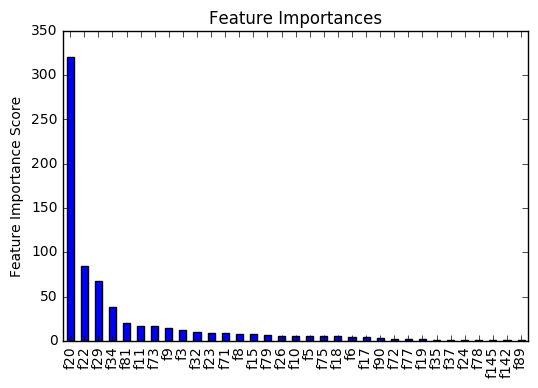

In [196]:
feature_importance = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [198]:
feature_importance

f20     320
f22      85
f29      67
f34      38
f81      20
f11      17
f73      17
f9       15
f3       12
f32      10
f23       9
f71       9
f8        8
f15       8
f79       7
f26       6
f10       6
f5        6
f75       6
f18       5
f6        4
f17       4
f90       3
f72       2
f77       2
f19       2
f35       1
f37       1
f24       1
f78       1
f145      1
f142      1
f89       1
dtype: int64